In [1]:
import gurobipy as gp
from gurobipy import GRB
import random
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString
import numpy as np
import warnings
from tqdm import tqdm_notebook as tqdm
import requests
import json
import API
import matplotlib.pyplot as plt
import GoogleDistanceMatrix
import GoogleVRP
import routing
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
warnings.filterwarnings('ignore')

## reality

In [2]:
order = pd.read_csv('Data/ProcessedJun29.csv')

In [3]:
order['departureTime'] = pd.to_datetime(order['departureTime'])

,日期,門店名稱,配送地址,下單時間,指派成功時間,騎手接單時間,到店取餐時間,取餐出發時間,訂單送達時間,預送達時間,Banner,Instant Order,收貨地址坐標,Rider,orderTime,arrivalTime,waitingTime,last取餐出發時間,lastRider,departureTime,tripDurationReal,DeliveryLatLon,shared,storeCode,lat,lon,StoreLatLon,tripDurationFromGoogle,timeParameter,foodPreparationTime
0,2020-06-29 00:00:00,PHD629,天水圍 天,2020-06-29 11:00:00,2020-06-29 11:13:33,2020-06-29 11:13:38,2020-06-29 11:13:39,2020-06-29 11:13:42,2020-06-29 11:22:38,2020-06-29 11:37:31,PHD,True,"22.45567240285639,114.00370732218273",David,2020-06-29 11:00:00,2020-06-29 11:22:38,0 days 00:22:38.000000000,NaN,NaN,2020-06-29 11:13:42,536.0,"22.4528801,114.0079903",0,PHD629,22.456107,113.998484,"22.456107199999998,113.99848390000001",429,2.135739,0 days 00:13:42.000000000
1,2020-06-29 00:00:00,PH64,半山 柏道 6 號 豫苑 第２座 15,2020-06-29 11:30:00,2020-06-29 11:31:01,2020-06-29 11:35:04,2020-06-29 11:35:07,2020-06-29 11:41:24,2020-06-29 11:55:11,2020-06-29 12:07:39,PHHK,True,"22.281882092108997,114.15014125938654",Tak,2020-06-29 11:30:00,2020-06-29 11:55:11,0 days 00:25:11.000000000,2020-06-29 11:13:42,David,2020-06-29 11:41:24,827.0,"22.2845609,114.1450617",0,PH64,22.284393,114.141973,"22.284392699999998,114.141973",231,2.135739,0 days 00:11:24.000000000
2,2020-06-29 00:00:00,PH57,天水圍 天榮路 天頌苑 頌畫閣 P 座 16 樓 14 單位,2020-06-29 11:45:00,2020-06-29 11:46:00,2020-06-29 11:52:01,2020-06-29 11:52:03,2020-06-29 11:52:17,2020-06-29 12:11:17,2020-06-29 12:17:23,PHHK,True,"22.45851151584804,114.00543686025577",singh jugtar,2020-06-29 11:45:00,2020-06-29 12:11:17,0 days 00:26:17.000000000,2020-06-29 11:41:24,Tak,2020-06-29 11:52:17,1140.0,"22.4613645,114.0004362",0,PH57,22.469012,114.002131,"22.469012,114.002131",482,2.135739,0 days 00:07:17.000000000
3,2020-06-29 00:00:00,PHD606,西環 正街 6-14 號 正豐大廈 7 樓 A 單,2020-06-29 11:57:00,2020-06-29 11:59:31,2020-06-29 11:59:43,2020-06-29 11:59:46,2020-06-29 12:08:35,2020-06-29 12:20:05,2020-06-29 12:40:34,PHD,True,"22.285609843328405,114.14719720209462",Hang,2020-06-29 11:57:00,2020-06-29 12:20:05,0 days 00:23:05.000000000,2020-06-29 11:52:17,singh jugtar,2020-06-29 12:08:35,690.0,"22.2882933,114.1421936",0,PHD606,22.284362,114.139793,"22.284361999999998,114.13979259999999",325,2.135739,0 days 00:11:35.000000000
4,2020-06-29 00:00:00,PH64,Sai Wan Victoria Road 64 號 Kwong Ga Factory 1...,2020-06-29 11:52:00,2020-06-29 11:53:01,2020-06-29 12:01:17,2020-06-29 12:01:20,2020-06-29 12:10:15,2020-06-29 12:55:57,2020-06-29 12:29:38,PHHK,True,"22.278933259216682,114.12696475733075",Feng,2020-06-29 11:52:00,2020-06-29 12:55:57,0 days 01:03:57.000000000,2020-06-29 12:08:35,Hang,2020-06-29 12:10:15,2742.0,"22.2817414,114.1218722",0,PH64,22.284393,114.141973,"22.284392699999998,114.141973",697,2.135739,0 days 00:18:15.000000000
5,2020-06-29 00:00:00,PH64,西環 薄扶林道 89 號 寶翠園 第三座 3 座 32 樓 A 單,2020-06-29 12:07:00,2020-06-29 12:10:01,2020-06-29 12:15:04,2020-06-29 12:15:07,2020-06-29 12:23:16,2020-06-29 12:46:00,2020-06-29 12:45:04,PHHK,True,"22.28205351989094,114.13896572685418",Tak,2020-06-29 12:07:00,2020-06-29 12:46:00,0 days 00:39:00.000000000,2020-06-29 12:10:15,Feng,2020-06-29 12:23:16,1364.0,"22.2847577,114.1326485",0,PH64,22.284393,114.141973,"22.284392699999998,114.141973",485,2.135739,0 days 00:16:16.000000000
6,2020-06-29 00:00:00,PH57,天水圍 天瑞路 天澤? 澤宇樓 25 樓,2020-06-29 12:22:00,2020-06-29 12:23:32,2020-06-29 12:30:06,2020-06-29 12:30:08,2020-06-29 12:30:09,2020-06-29 12:57:15,2020-06-29 13:14:50,PHHK,True,"22.46445865990481,114.00234064922508",singh jugtar,2020-06-29 12:22:00,2020-06-29 12:57:15,0 days 00:35:15.000000000,2020-06-29 12:23:16,Tak,2020-06-29 12:30:09,1626.0,"22.4674323,113.9973532",0,PH57,22.469012,114.002131,"22.469012,114.002131",488,2.135739,0 days 00:08:09.000000000
7,2020-06-29 00:00:00,PH57,天水圍 天靖街 天盛苑 盛賢閣 D座 座 16 樓 10 單位,2020-06-29 12:27:00,2020-06-29 12:36:07,2020-06-29 12:36:51,2020-06-29 12:38:09,2020-06-29 12:49:07,2020-06-29 13:06:51,2020-06-29 13:19:39,PHHK,True,"22.445099073685512,114.00641344873654",BILLY,2020-06-29 12:27:00

In [64]:
order.shape

(1038, 30)

In [65]:
order['門店名稱'].unique()

array(['PHD629', 'PH64', 'PH57', 'PHD606'], dtype=object)

In [66]:
order = order.loc[order['門店名稱'].isin(['PH64','PHD606'])]
order.shape

(411, 30)

In [6]:
order.loc[order['Rider']=='3rdParty'].shape

(0, 30)

In [7]:
order['foodPreparationTime'] = pd.to_datetime(order['取餐出發時間']) - pd.to_datetime(order['下單時間'])

In [8]:
order.loc[order['shared']==1].shape

(195, 30)

In [9]:
order.groupby(['取餐出發時間','Rider']).count().shape

(316, 28)

In [10]:
order['tripDurationReal'].mean()/60

20.741362530413628

In [11]:
0.17*60

10.200000000000001

In [12]:
order.groupby(['取餐出發時間','Rider']).count().groupby(['orderTime']).count()['arrivalTime'].sum()

316

order = order.loc[order['tripDurationReal']>=order['tripDurationFromGoogle']]

In [13]:
pd.to_timedelta(order['waitingTime']).mean()

Timedelta('0 days 00:42:01.554744')

In [14]:
pd.to_timedelta(order.loc[order['shared']==0]['waitingTime']).mean()

Timedelta('0 days 00:37:29.740740')

In [15]:
pd.to_timedelta(order.loc[order['shared']==1]['waitingTime']).mean()

Timedelta('0 days 00:47:02.641025')

In [16]:
from scipy import stats
stats.ttest_ind(order.loc[order['shared']==0]['foodPreparationTime'].dt.seconds,
                order.loc[order['shared']==1]['foodPreparationTime'].dt.seconds)

Ttest_indResult(statistic=0.030609138971453308, pvalue=0.9755961843426867)

In [17]:
order = order[['orderTime', 'arrivalTime', 'foodPreparationTime','waitingTime', 'departureTime', 'tripDurationReal',
       'DeliveryLatLon', 'storeCode', 'StoreLatLon',
       'tripDurationFromGoogle', 'shared']]

In [35]:
order['departureTime'] = pd.to_datetime(order['departureTime'])
order['hour'] = order['departureTime'].dt.hour
order['min'] = order['departureTime'].dt.minute
order['min'] = order['min'].apply(lambda x: (int(x/5)+1)*5)

In [36]:
order['timeWindow'] = pd.Timedelta('0 days 00:50:00') - order['foodPreparationTime']
order['timeWindow'] = order['timeWindow'].dt.seconds
# order['timeWindow']

In [37]:
(order['timeWindow'] < order['tripDurationReal']).sum()

194

In [53]:
order.tripDurationReal.describe()

count     310.000000
mean     1029.083871
std       605.592341
min         2.000000
25%       627.000000
50%       912.500000
75%      1376.500000
max      5509.000000
Name: tripDurationReal, dtype: float64

In [54]:
order['timeParameter'] = order['tripDurationReal']/order['tripDurationFromGoogle']
order['timeParameter'] = order['timeParameter'].median()
# timeParameter = order.groupby(['hour','min','shared']).agg({'timeParameter':'min'}).reset_index()
# timeParameter = timeParameter.loc[timeParameter['shared']==0]
# del timeParameter['shared']
# del order['timeParameter']

In [55]:
order['timeParameter'].median()

1.9207486547388024

In [341]:
order[order['tripDurationReal'] < 60]['tripDurationReal'] = 1.92 * order[order['tripDurationReal'] < 60]['tripDurationFromGoogle']

In [342]:
pd.to_timedelta(order['waitingTime']).mean()

Timedelta('0 days 00:32:42.621761')

# simulation

In [197]:
output = pd.read_csv('Output/order64_606_3min_45min_2stores_7013.csv')
output['waitingTimeSimulation'] = pd.to_timedelta(output['waitingTimeSimulation'])

In [198]:
len(output.loc[output['rider']=='3rd'])

0

In [199]:
output.shape

(411, 24)

In [200]:
output.groupby(['departureTimeSimulation','rider']).count().shape

(274, 22)

In [201]:
output = output.sort_values(by=['departureTimeSimulation','rider'])
output['last取餐出發時間'] = output['departureTimeSimulation'].shift(1)
output['lastRider'] = output['rider'].shift(1)
output['pre取餐出發時間'] = output['departureTimeSimulation'].shift(-1)
output['preRider'] = output['rider'].shift(-1)
output['shared'] = 0
output.loc[((output['last取餐出發時間']==output['departureTimeSimulation'])&(output['lastRider']==output['rider']))|
                   ((output['pre取餐出發時間']==output['departureTimeSimulation'])&(output['preRider']==output['rider'])),'shared']=1


In [202]:
output['waitingTimeSimulation'].mean()

Timedelta('0 days 00:37:23.288900')

In [203]:
output['tripTime'].mean()/60

15.197799591688328

In [204]:
output.loc[output['shared']==1].shape

(240, 28)

In [205]:
output.groupby(['departureTimeSimulation','rider']).count().groupby(['orderTime']).count()

,arrivalTime,foodPreparationTime,waitingTime,departureTime,tripDurationReal,DeliveryLatLon,storeCode,StoreLatLon,tripDurationFromGoogle,shared,Rider,timeParameter,hour,min,timeWindow,date,tripTime,delayed,arrivalTimeSimulation,waitingTimeSimulation,waitingTimeReal,last取餐出發時間,lastRider,pre取餐出發時間,preRider
orderTime,,,,,,,,,,,,,,,,,,,,,,,,,
1,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171
2,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75
3,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [206]:
output.groupby(['departureTimeSimulation','rider']).count().groupby(['orderTime']).count()['arrivalTime'].sum()

274

In [208]:
171/274

0.6240875912408759

In [230]:
columns = ['Benchmark','5/55','3/45','1/-']
one =   [0.74,0.68, 0.73,0.89]
two =   [0.21,0.25, 0.22,0.1]
three = [0.04,0.05, 0.04,0.008]
four =  [0,   0.003,0,0]
five =  [0,   0,    0,0]
ratio = pd.DataFrame({'1':one,'2':two,'3':three,'4':four,'5':five})

In [231]:
ratio = ratio.T
ratio.columns = columns
ratio

,Benchmark,5/55,3/45,1/-
1,0.74,0.680,0.73,0.890
2,0.21,0.250,0.22,0.100
3,0.04,0.050,0.04,0.008
4,0.00,0.003,0.00,0.000
5,0.00,0.000,0.00,0.000


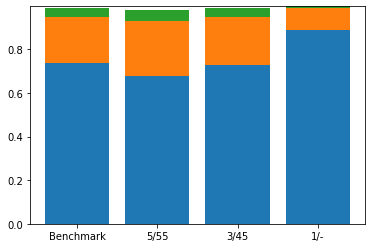

In [232]:
plotdf = ratio.iloc[0]
bot = np.zeros(4)
for i in range(5):
    plt.bar(ratio.columns,ratio.iloc[i].values,bottom=bot,label='%s order per trip'%i)
    bot += ratio.iloc[i].values
plt.savefig('s1',bbox_inches='tight',dpi=150,figsize=(5,8))

In [233]:
one =   [0.74,0.57,0.62, 0.65]
two =   [0.21,0.27,0.27, 0.28]
three = [0.04,0.11,0.08, 0.065]
four =  [0,   0.03,0.01, 0]
five =  [0,   0.01,0.003,0]

In [234]:
ratio = pd.DataFrame({'1':one,'2':two,'3':three,'4':four,'5':five})
ratio = ratio.T
ratio.columns = columns

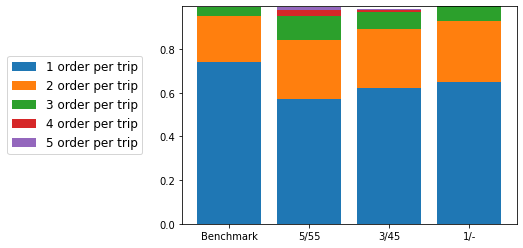

In [237]:
plotdf = ratio.iloc[0]
bot = np.zeros(4)
for i in range(5):
    plt.bar(ratio.columns,ratio.iloc[i].values,bottom=bot,label='%s order per trip'%(i+1))
    bot += ratio.iloc[i].values
_ = plt.legend(loc='best', bbox_to_anchor=(-0.1, 0.3, 0, 0.5),fontsize=12)
plt.savefig('s2',bbox_inches='tight',dpi=150,figsize=(5,8))